<a href="https://colab.research.google.com/github/harishahamed26/PredictionOfHeartRate/blob/main/HeartRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat Rate Prediction


Installation of pmdarima package

In [1]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
# Importing of Necessary Libraries

import pandas as pd
import numpy  as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error


In [3]:
# Reading the CSV File and Printing the first 5 rows
df_HeartRate = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/PredictionOfHeartRate/main/PT_Train.csv')

df_HeartRate.head(5)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


# Data Cleaning and EDA

In [4]:
# Dropping the unnecessary atrributes

df_HeartRate = df_HeartRate.drop(['Lifetouch Respiration Rate', 'Oximeter SpO2',
       'Oximeter Pulse'], axis = 1)

In [5]:
df_HeartRate.info()  # Checking the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp (GMT)       226 non-null    object
 1   Lifetouch Heart Rate  226 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [6]:
df_HeartRate.describe() # Descriptive Statistic Analysis

,Lifetouch Heart Rate
count,226.000000
mean,2315.615044
std,11351.588825
min,106.000000
25%,136.000000
50%,145.000000
75%,156.000000
max,61442.000000


In [7]:
df_HeartRate.isna().sum() # Checking whether data has na/nan/null values

Timestamp (GMT)         0
Lifetouch Heart Rate    0
dtype: int64

In [8]:
# Replacing the / to -  to process datetime 

df_HeartRate['Timestamp (GMT)'] = df_HeartRate['Timestamp (GMT)'].replace({'/' : '-'} , regex=True)
df_HeartRate['Timestamp (GMT)'] 

0      17-08-2015 15:09
1      17-08-2015 15:10
2      17-08-2015 15:11
3      17-08-2015 15:12
4      17-08-2015 15:13
             ...       
221    17-08-2015 18:50
222    17-08-2015 18:51
223    17-08-2015 18:52
224    17-08-2015 18:53
225    17-08-2015 18:54
Name: Timestamp (GMT), Length: 226, dtype: object

In [9]:
# Generating the step count based length of the dataset

Step_Count = list(range(0, len(df_HeartRate)))


In [10]:
# Defining the plotting function

def Plot_TimeSeries(x,y):  
    plt.figure(figsize=(10,10))
    plt.plot(x ,y , color = 'Red')
    plt.title("Line Graph for 'Lifetouch Heart Rate' and 'Step Count' ")
    plt.xlabel('Lifetouch Heart Rate')
    plt.ylabel('Step Count')
    plt.show()


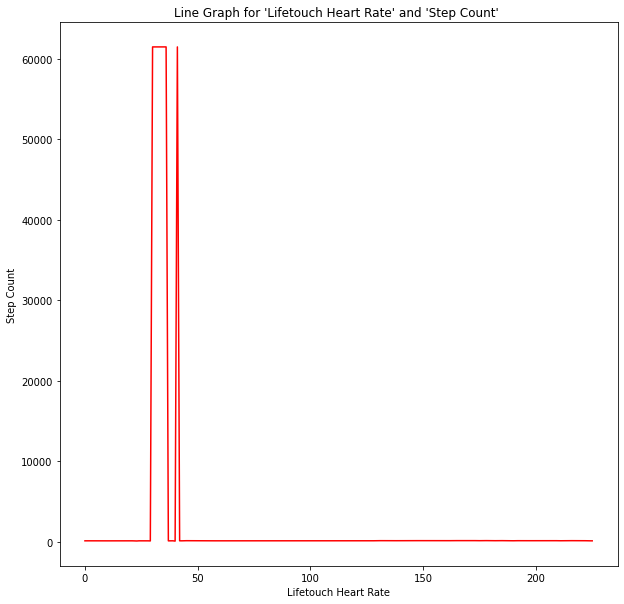

In [11]:
'''
 Calling the plotting function by passing the attributes
 x = df_HeartRate['Timestamp (GMT)']
 y = Step Count
'''

Plot_TimeSeries(Step_Count,df_HeartRate['Lifetouch Heart Rate'])

In [12]:
# Defining the function to checking statiionarity

def Check_Stationary(series):
    statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
    print(f'p value : {p_value}')
    if p_value > 0.05:                    # confidence interval = 95%
      print('The series is stationary')
    else: 
      print('The series is not stationary')
    



In [13]:
# Importing warning to ignore the unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Calling the stationary funciton to check stationarity
Check_Stationary(df_HeartRate['Lifetouch Heart Rate'])

p value : 0.1
The series is stationary



 Plotting the graph after removing the noise


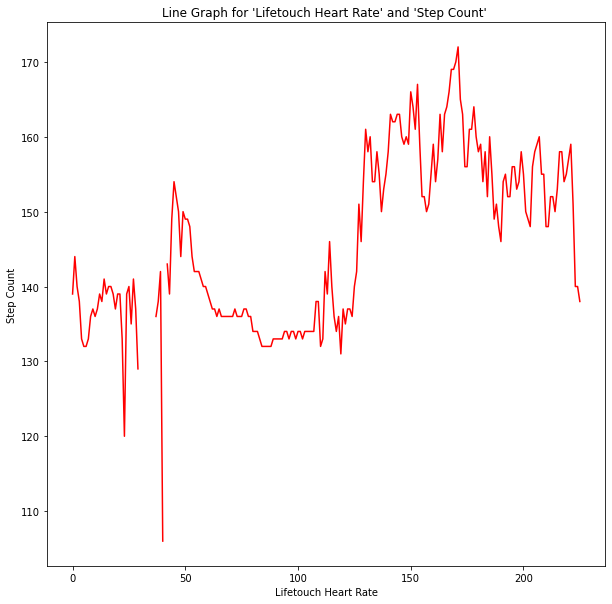

In [14]:
# Removing the noise using np where function
df_HeartRate['Lifetouch Heart Rate'] = np.where(df_HeartRate['Lifetouch Heart Rate']>200,np.nan,df_HeartRate['Lifetouch Heart Rate'])

print('\n Plotting the graph after removing the noise')
Plot_TimeSeries(Step_Count,df_HeartRate['Lifetouch Heart Rate'])



 Plotting the graph after filling the noise


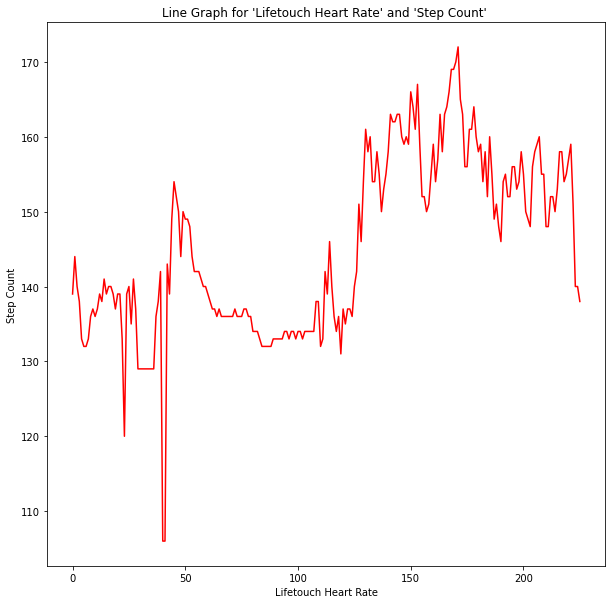

In [15]:
# Using forward fill method to fill the nan values
df_HeartRate['Lifetouch Heart Rate']= df_HeartRate['Lifetouch Heart Rate'].ffill()
df_HeartRate['Lifetouch Heart Rate']= df_HeartRate['Lifetouch Heart Rate'].bfill()
print('\n Plotting the graph after filling the noise')
Plot_TimeSeries(Step_Count,df_HeartRate['Lifetouch Heart Rate'])


In [16]:
# Convert the month column to a datetime object
df_HeartRate['Timestamp (GMT)'] = pd.to_datetime(df_HeartRate['Timestamp (GMT)'])


In [17]:
# Checking the stationarity

Check_Stationary(df_HeartRate['Lifetouch Heart Rate'])

p value : 0.01
The series is not stationary


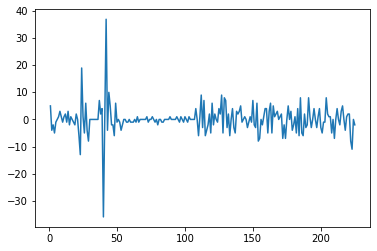

In [18]:
df_HeartRate['Lifetouch Heart Rate'].diff().dropna().plot()

# ACF & PACF


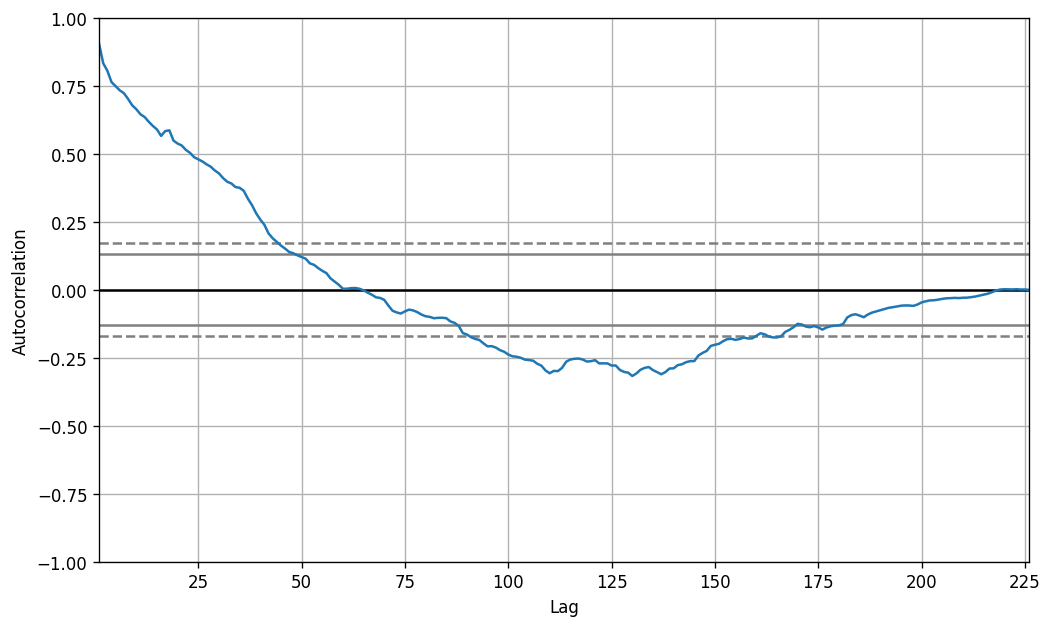

In [19]:
# Test for seasonality - Autocorrelation Function (ACF) plot. 
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df_HeartRate['Lifetouch Heart Rate'].tolist())

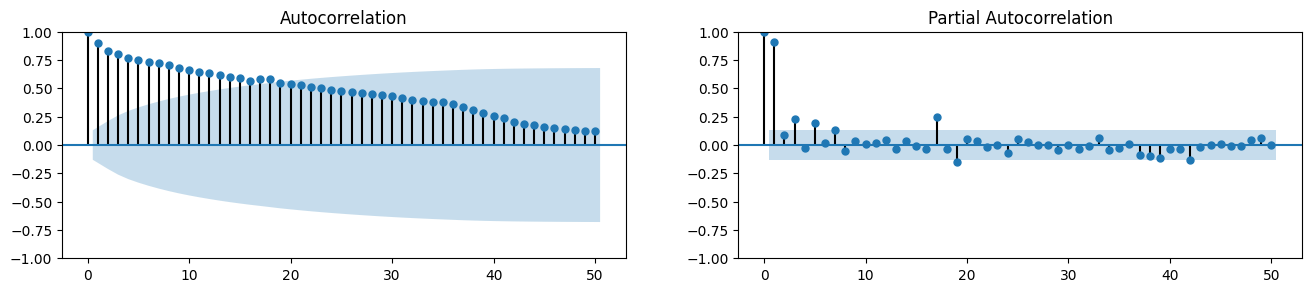

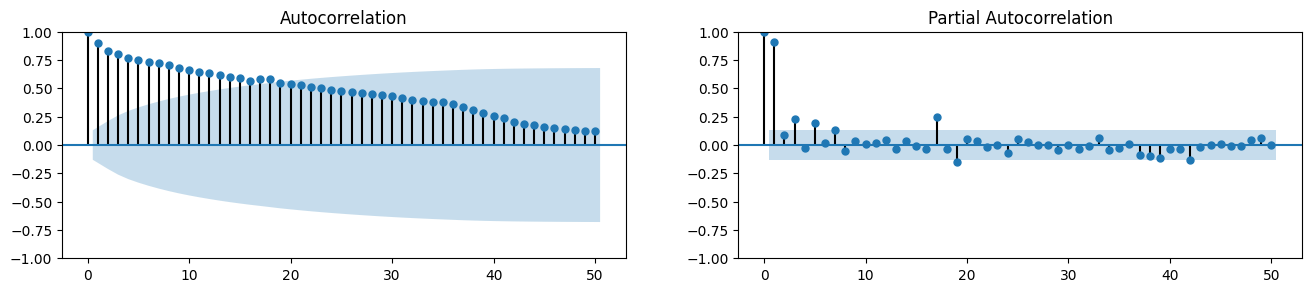

In [20]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_HeartRate['Lifetouch Heart Rate'].tolist(), lags=50, ax=axes[0])
plot_pacf(df_HeartRate['Lifetouch Heart Rate'].tolist(), lags=50, ax=axes[1])

# Model Building

In [21]:
# Selecting the order for ARIMA  model

model_fit = auto_arima(df_HeartRate['Lifetouch Heart Rate'], m=12,d=0,D=0,max_order=None,max_p=7,max_q=7,
                       max_d=2,max_P=7,max_Q=7,max_D=2,maxiter = 100,alpha = 0.05,n_jobs = -1,seasonal=True,
                       trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True
                       )

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=9.00 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1759.996, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1375.351, Time=1.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1508.019, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2894.836, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1374.659, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1375.344, Time=1.61 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1377.336, Time=2.05 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1375.305, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1374.085, Time=0.94 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1375.292, Time=2.17 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1375.276, Time=1.18 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1376.004, Time=5.32 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1552.493, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -673.828
Date:                Sat, 18 Feb 2023   AIC                           1359.655
Time:                        14:36:07   BIC                           1380.178
Sample:                             0   HQIC                          1367.937
                                - 226                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.4593      4.394      1.925      0.054      -0.153      17.072
ar.L1          0.5456      0.145      3.757      0.000       0.261       0.830
ar.L2          0.3958      0.147      2.694      0.007       0.108       0.684
ma.L1          0.2905      0.126      2.302      0.021       0.043       0.538
ma.L2         -0.3651      0.056     -6.465      0.000      -0.476      -0.254
sigma2        22.5565      1.050     21.486      0.000      20.499      24.614
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2307.23
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.2320      5.901     24.443      0.000     132.667     155.797
ar.L1          0.5457      0.145      3.755      0.000       0.261       0.831
ar.L2          0.3956      0.147      2.691      0.007       0.108       0.684
ma.L1          0.2903      0.126      2.300      0.021       0.043       0.538
ma.L2         -0.3651      0.056     -6.464      0.000      -0.476      -0.254
sigma2        22.5613      1.050     21.482      0.000      20.503      24.620


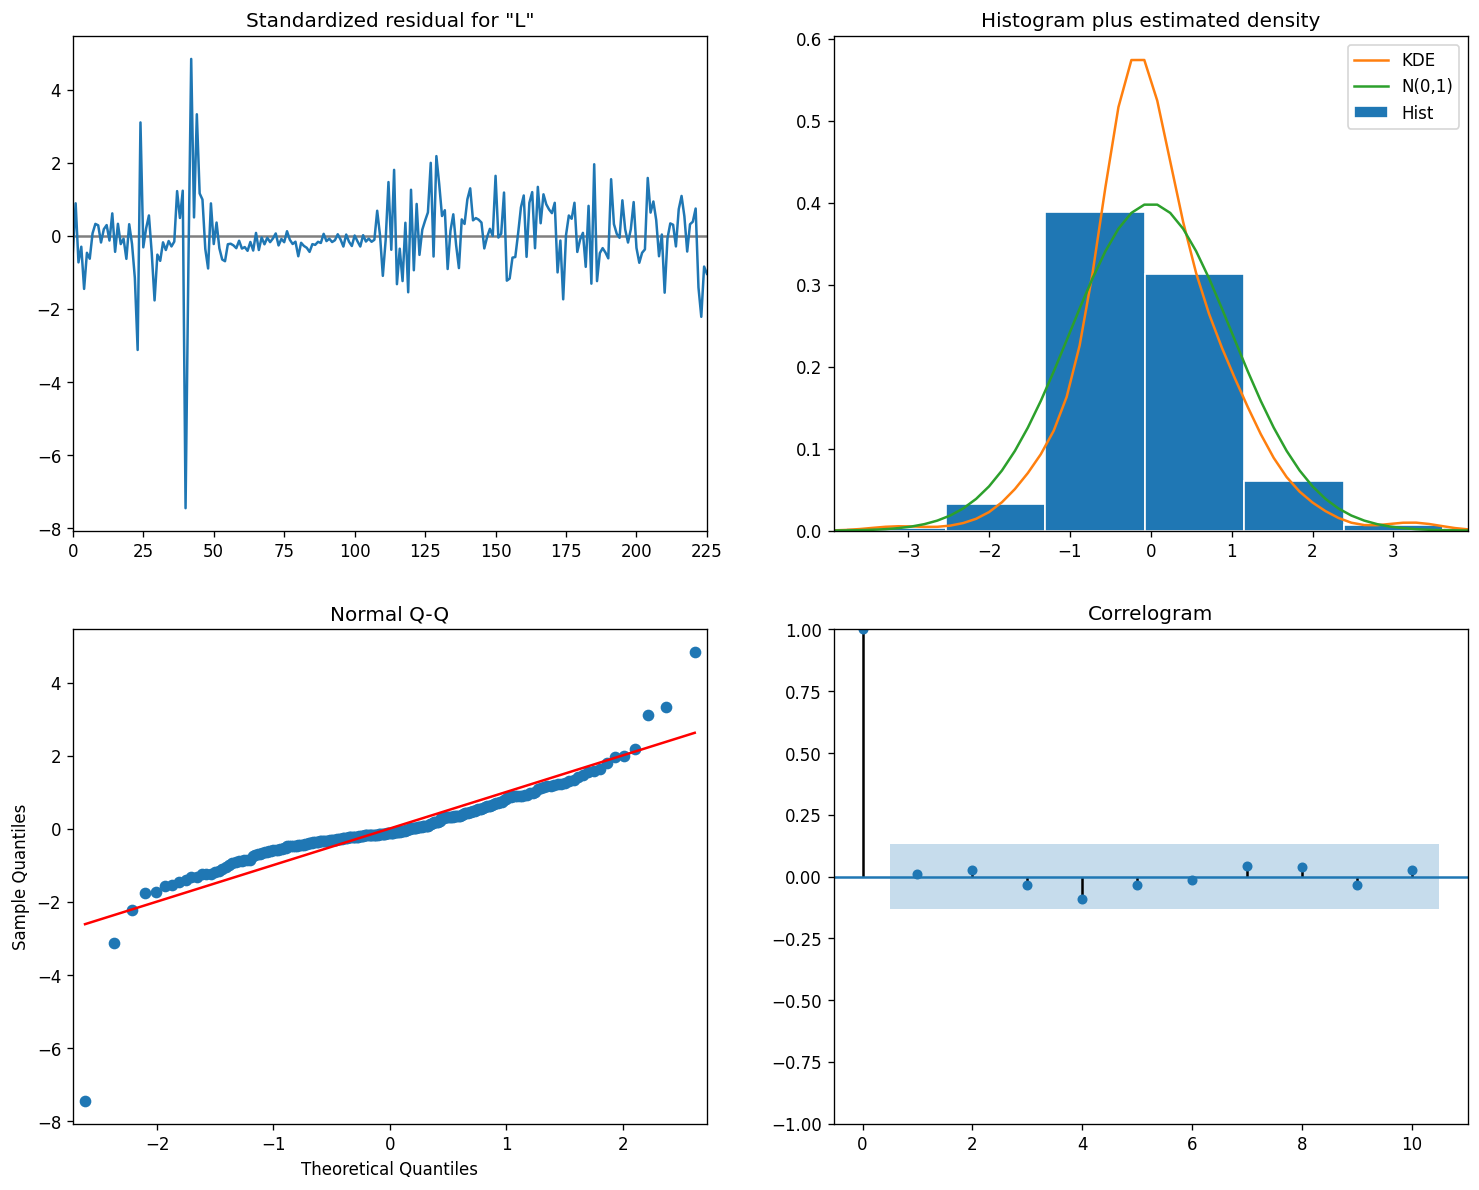

In [22]:
# Import the necessary libraries
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

# Split the data into training and testing sets

train = df_HeartRate['Lifetouch Heart Rate']
test = df_HeartRate['Lifetouch Heart Rate'][226:]



# Fit the ARMA model
model = sm.tsa.arima.ARIMA(train, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary().tables[1])
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [23]:
l1  = len(df_HeartRate['Lifetouch Heart Rate'])
l2  = len(df_HeartRate['Lifetouch Heart Rate'])+20


In [24]:
# testing 

#df_HeartRate['predict'] =  model_fit.predict(start='2015-08-17 18:54:00', end='2015-08-17 19:15:00')

Forecast =  model_fit.predict(start = 0, end=l1)
Predict_20M =  model_fit.predict(start = l1+1, end=l2)

In [25]:
from math import sqrt
from sklearn.metrics import mean_squared_error

 
MSE = np.square(np.subtract(df_HeartRate['Lifetouch Heart Rate'],Forecast)).mean() 
 
MAPE = np.mean(np.abs(Forecast - df_HeartRate['Lifetouch Heart Rate'])/np.abs(df_HeartRate['Lifetouch Heart Rate'])) 
RMSE = sqrt(MSE)
print(f'MSE {MSE},RMSE {RMSE}, MAPE {MAPE}')

MSE 22.68071105969492,RMSE 4.762427013581932, MAPE 0.021136224903592984


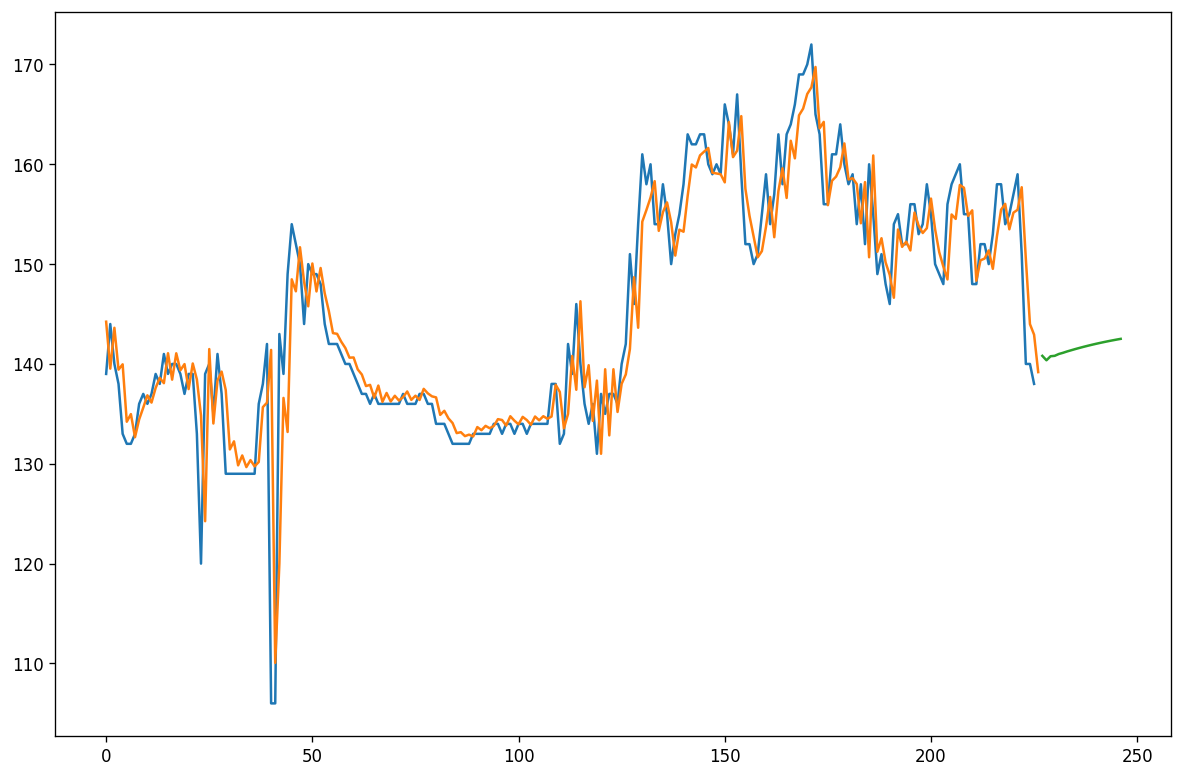

In [26]:
df_HeartRate['Lifetouch Heart Rate'].plot(figsize=(12,8))
Forecast.plot()
Predict_20M.plot()

## SARIMAX

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6944      0.166      4.180      0.000       0.369       1.020
ar.L2          0.3055      0.165      1.850      0.064      -0.018       0.629
ma.L1          0.1584      0.137      1.157      0.247      -0.110       0.427
ma.L2         -0.4104      0.041     -9.893      0.000      -0.492      -0.329
sigma2        23.0697      1.070     21.563      0.000      20.973      25.167


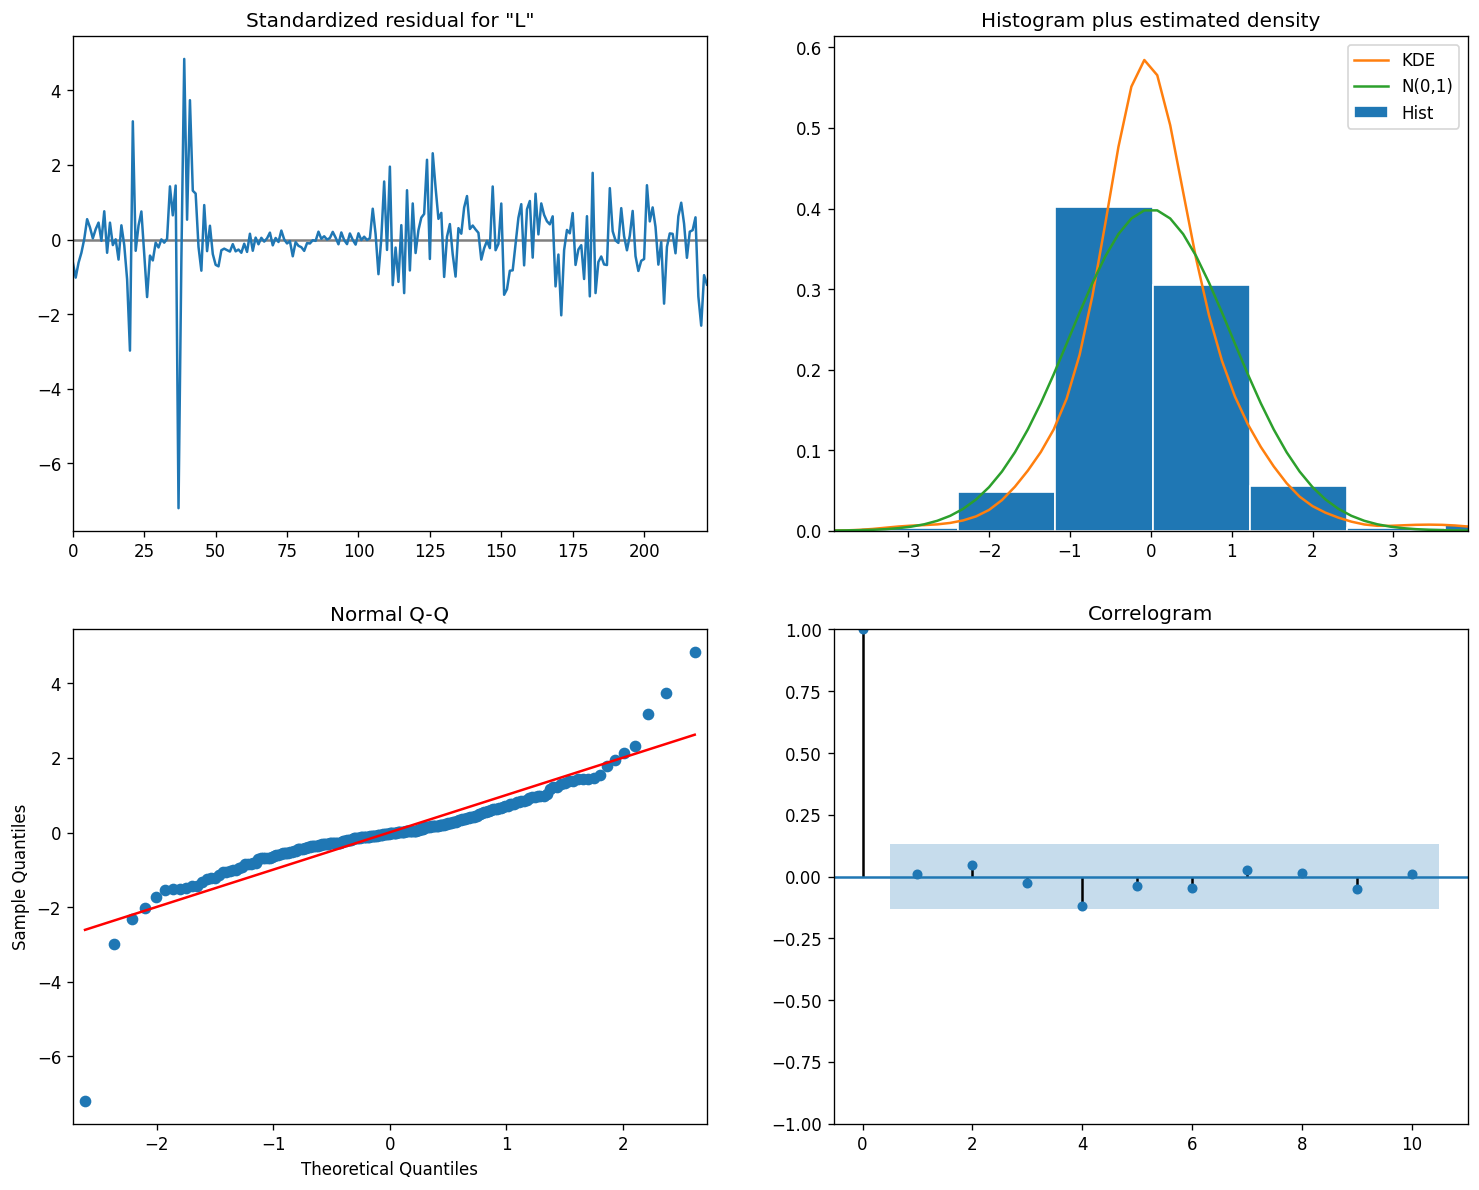

In [27]:
# Implementaiton of SARIMAX

mod = sm.tsa.statespace.SARIMAX(train,
                                order=(2, 0, 2),
                                seasonal_order=(0,0,0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit() 

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15,12))
plt.show()

In [28]:
Forecast_S =  results.predict(start = 0, end=l1)
Predict_20M_S =  results.predict(start = l1+1, end=l2)

In [29]:
print(Forecast_S)

0        0.000000
1       96.520726
2      142.451032
3      141.200101
4      138.339496
          ...    
222    158.323628
223    151.087722
224    144.587536
225    143.802177
226    139.553329
Name: predicted_mean, Length: 227, dtype: float64


In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error

 
MSE = np.square(np.subtract(df_HeartRate['Lifetouch Heart Rate'],Forecast_S)).mean() 
 
RMSE = sqrt(MSE)
print(MSE, RMSE)

118.28424697783282 10.87585614918811


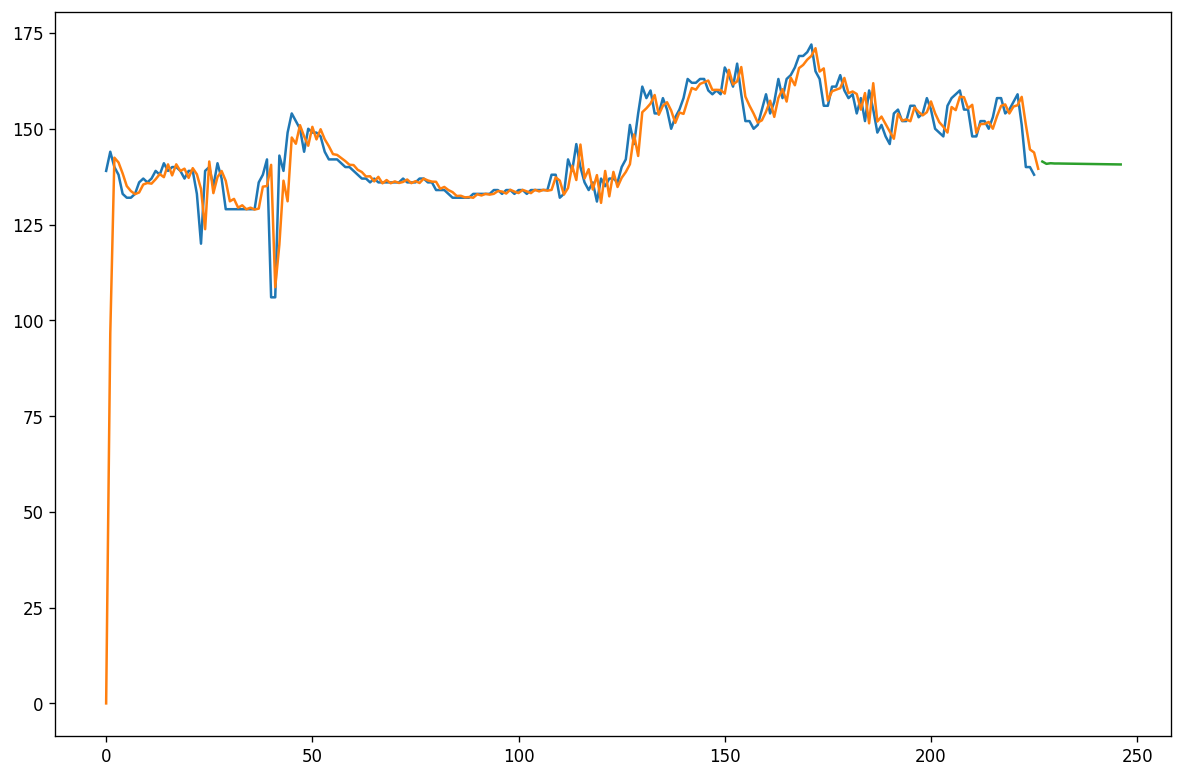

In [31]:
df_HeartRate['Lifetouch Heart Rate'].plot(figsize=(12,8))
Forecast_S.plot()
Predict_20M_S.plot()

## AutoTS


In [32]:
! pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.4/686.4 KB 12.3 MB/s eta 0:00:00


In [33]:
df_HeartRate['Timestamp (GMT)'].head(5)

0   2015-08-17 15:09:00
1   2015-08-17 15:10:00
2   2015-08-17 15:11:00
3   2015-08-17 15:12:00
4   2015-08-17 15:13:00
Name: Timestamp (GMT), dtype: datetime64[ns]

In [ ]:
from autots import AutoTS
mod = AutoTS(forecast_length=20, frequency='infer',  ensemble='simple')

mod = mod.fit(df_HeartRate, date_col='Timestamp (GMT)', value_col='Lifetouch Heart Rate', id_col=None)


prediction = mod.predict()

forecast = prediction.forecast


Inferred frequency is: T
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
7/7 [==============================] - 9s 7ms/step - loss: 0.3843
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3828
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3832
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3776
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3744
Epoch 6/50
7/7 [==============================] - 0s 6ms/step 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/v58bph8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/83f2idkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52461', 'data', 'file=/tmp/tmpomupllex/v58bph8i.json', 'init=/tmp/tmpomupllex/83f2idkt.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelwsll_kyx/prophet_model-20230218143731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain 

Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 37: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents in generation 0 of 10
Model Number: 45 with model ETS in generation 0 of 10
Model Number: 46 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 46: VECM
Model Number: 47 with model ARDL in generation 0 of 10
Model Number: 48 with model MultivariateMotif in generation 0 of 10
Model Number: 49 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/5bpa08xg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/83qepfyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55401', 'data', 'file=/tmp/tmpomupllex/5bpa08xg.json', 'init=/tmp/tmpomupllex/83qepfyx.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelov0aknd3/prophet_model-20230218143735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 55 with model FBProphet in generation 0 of 10


14:37:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 56 with model SeasonalNaive in generation 0 of 10
Model Number: 57 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Template Eval Error: ValueError('freq T not understood. Please report if you think this is in error.') in model 59: Theta
Model Number: 60 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 60: UnivariateRegression
Model Number: 61 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 61: ARCH
Model Number: 62 with model ConstantNaive in generation 0 of 10
Model Number: 63 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 63: LastValueNaive
Model Number: 64 with model AverageValueNaive in generation 0 of 10
Model Number: 65 with model GLS in generation 0 of 10
Model Number: 66 with model SeasonalNaive in g

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/viaynppb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/fiwvlcvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99502', 'data', 'file=/tmp/tmpomupllex/viaynppb.json', 'init=/tmp/tmpomupllex/fiwvlcvv.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelz9inyr_k/prophet_model-20230218143736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 69 with model FBProphet in generation 0 of 10


14:37:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 70: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Model Number: 72 with model VAR in generation 0 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 72: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 73: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Model Number: 75 with model WindowRegression in generation 0 of 10
Template Eval Error: KeyError('model') in model 75: WindowRegression
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 76: DatepartRegression
Model Number: 77 wi

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 112 with model MetricMotif in generation 0 of 10
Model Number: 113 with model AverageValueNaive in generation 0 of 10
Model Number: 114 with model ARDL in generation 0 of 10
Model Number: 115 with model ARDL in generation 0 of 10
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 117 with model SeasonalNaive in generation 0 of 10
Model Number: 118 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 118: ARDL
Model Number: 119 with model ConstantNaive in generation 0 of 10
Model Number: 120 with model ARIMA in generation 0 of 10
Model Number: 121 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 121: ARCH
Model Number: 122 with model Theta in generation 0 of 10
Template Eval Error: ValueError('freq T not understood. Please report if you think this is in error.') in model 122: Theta
Mode

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 170: ARCH
Model Number: 171 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/efgtbx8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/55_za1xo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74992', 'data', 'file=/tmp/tmpomupllex/efgtbx8n.json', 'init=/tmp/tmpomupllex/55_za1xo.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelnrh82736/prophet_model-20230218143746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 172 with model AverageValueNaive in generation 0 of 10
Model Number: 173 with model MultivariateMotif in generation 0 of 10
Model Number: 174 with model Theta in generation 0 of 10
Template Eval Error: ValueError('freq T not understood. Please report if you think this is in error.') in model 174: Theta
Model Number: 175 with model GLM in generation 0 of 10
Model Number: 176 with model UnivariateMotif in generation 0 of 10
Model Number: 177 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 177: ARDL
Model Number: 178 with model MultivariateMotif in generation 0 of 10
Model Number: 179 with model NVAR in generation 0 of 10
Model Number: 180 with model UnivariateMotif in generation 0 of 10
Model Number: 181 with model Theta in generation 0 of 10
Template Eval Error: ValueError('freq T not understood. Please report if you think this is in error.') in model 181: Theta
Model Number: 182 wit

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/8iemw2sw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/o9agfumg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18542', 'data', 'file=/tmp/tmpomupllex/8iemw2sw.json', 'init=/tmp/tmpomupllex/o9agfumg.json', 'output', 'file=/tmp/tmpomupllex/prophet_model96tg5qfr/prophet_model-20230218143755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain 

Model Number: 220 with model ARDL in generation 1 of 10
Model Number: 221 with model AverageValueNaive in generation 1 of 10
Model Number: 222 with model DatepartRegression in generation 1 of 10
Model Number: 223 with model ARDL in generation 1 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 223: ARDL
Model Number: 224 with model MultivariateMotif in generation 1 of 10
Model Number: 225 with model AverageValueNaive in generation 1 of 10
Model Number: 226 with model ARDL in generation 1 of 10
Model Number: 227 with model UnivariateMotif in generation 1 of 10
Model Number: 228 with model NVAR in generation 1 of 10
Model Number: 229 with model MetricMotif in generation 1 of 10
Model Number: 230 with model MultivariateRegression in generation 1 of 10
Model Number: 231 with model MultivariateMotif in generation 1 of 10
Model Number: 232 with model SectionalMotif in generation 1 of 10
Model Number: 233 w

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/efxrjuhi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/3sojslrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35993', 'data', 'file=/tmp/tmpomupllex/efxrjuhi.json', 'init=/tmp/tmpomupllex/3sojslrx.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelynn833yq/prophet_model-20230218143757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain 

Model Number: 242 with model ConstantNaive in generation 1 of 10
Model Number: 243 with model SeasonalNaive in generation 1 of 10
Model Number: 244 with model ETS in generation 1 of 10
Model Number: 245 with model MetricMotif in generation 1 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 245: MetricMotif
Model Number: 246 with model AverageValueNaive in generation 1 of 10
Model Number: 247 with model AverageValueNaive in generation 1 of 10
Model Number: 248 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 248: AverageValueNaive
Model Number: 249 with model NVAR in generation 1 of 10
Model Number: 250 with model DatepartRegression in generation 1 of 10
Epoch 1/50
6/6 [==============================] - 11s 160ms/step - loss: 4.0107 - val_loss: 3.8880
Epoch 2/50
6/6 [==============================] - 0s 47ms/step - loss: 3.4744 - val_loss: 3.5964
Epoch 3/50
6/6 [======

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 365 with model NVAR in generation 2 of 10
Model Number: 366 with model UnivariateMotif in generation 2 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 367 with model DatepartRegression in generation 2 of 10
Model Number: 368 with model AverageValueNaive in generation 2 of 10
Model Number: 369 with model SeasonalNaive in generation 2 of 10
Model Number: 370 with model MultivariateMotif in generation 2 of 10
Model Number: 371 with model DatepartRegression in generation 2 of 10
Model Number: 372 with model LastValueNaive in generation 2 of 10
Model Number: 373 with model MetricMotif in generation 2 of 10
Model Number: 374 with model Theta in generation 2 of 10
Model Number: 375 with model SectionalMotif in generation 2 of 10
Model Number: 376 with model ARDL in generation 2 of 10
Model Number: 377 with model AverageValueNaive in generation 2 of 10
Model Number: 378 with model ConstantNaive in generation 2 of 10
Model Number: 379 with model LastValueNaive in generation 2 of 10
Model Number: 380 with model MetricMotif in generation 2 of 10
Model Number: 381 with model NVAR in generation 2 of 10
Model Number: 382 with model M

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/8lm49j_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/kkwmfa4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23470', 'data', 'file=/tmp/tmpomupllex/8lm49j_b.json', 'init=/tmp/tmpomupllex/kkwmfa4f.json', 'output', 'file=/tmp/tmpomupllex/prophet_model2k1de45m/prophet_model-20230218144027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 413 with model FBProphet in generation 2 of 10


14:40:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 414 with model ETS in generation 2 of 10
Model Number: 415 with model SectionalMotif in generation 2 of 10
Model Number: 416 with model LastValueNaive in generation 2 of 10
Model Number: 417 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 417: DatepartRegression
Model Number: 418 with model NVAR in generation 2 of 10
Model Number: 419 with model GLM in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 419: GLM
Model Number: 420 with model SeasonalNaive in generation 2 of 10
Model Number: 421 with model NVAR in generation 2 of 10
Model Number: 422 with model MultivariateMotif in generation 2 of 10
Model Number: 423 with model NVAR in generation 2 of 10
Model Number: 424 with model AverageValueNaive in generation 2 of 10
Model Number: 425 with model GLS in generation 2 of 10
Model Number: 426 with model ETS in generation 2 of 10
ETS err

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 506 with model MetricMotif in generation 3 of 10
Model Number: 507 with model GLM in generation 3 of 10
Model Number: 508 with model ETS in generation 3 of 10
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 508: ETS
Model Number: 509 with model MultivariateRegression in generation 3 of 10
Model Number: 510 with model MetricMotif in generation 3 of 10
Model Number: 511 with model ARDL in generation 3 of 10
Model Number: 512 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 513 with model SeasonalNaive in generation 3 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 514 with model MetricMotif in generation 3 of 10
Model Number: 515 with model UnobservedComponents in generation 3 of 10
Model Number: 516 with model ETS in generation 3 of 10
Model Number: 517 with model GLS in generation 3 of 10
Model Number: 518 with model LastValueNaive in generation 3 of 10
Model Number: 519 with model DatepartRegression in generation 3 of 10
Model Number: 520 with model SeasonalNaive in generation 3 of 10
Model Number: 521 with model SeasonalNaive in generation 3 of 10
Model Number: 522 with model ETS in generation 3 of 10
Model Number: 523 with model ARIMA in generation 3 of 10
Model Number: 524 with model AverageValueNaive in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/rzgeiokn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/6cdos54z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36532', 'data', 'file=/tmp/tmpomupllex/rzgeiokn.json', 'init=/tmp/tmpomupllex/6cdos54z.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelybw0s3nx/prophet_model-20230218144112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:12 - cmdstanpy - INFO - Chain 

Model Number: 525 with model FBProphet in generation 3 of 10
Model Number: 526 with model ARIMA in generation 3 of 10
Model Number: 527 with model ARIMA in generation 3 of 10
Model Number: 528 with model ARIMA in generation 3 of 10
Model Number: 529 with model ARIMA in generation 3 of 10
Model Number: 530 with model ARIMA in generation 3 of 10
Model Number: 531 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 531: DatepartRegression
Model Number: 532 with model ARDL in generation 3 of 10
Model Number: 533 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 533: SeasonalNaive
Model Number: 534 with model MultivariateMotif in generation 3 of 10
Model Number: 535 with model NVAR in generation 3 of 10
Model Number: 536 with model AverageValueNaive in generation 3 of 10
Model Number: 537 with model AverageValueNaive in

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/qqsh09tv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/ftgwqqzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22522', 'data', 'file=/tmp/tmpomupllex/qqsh09tv.json', 'init=/tmp/tmpomupllex/ftgwqqzg.json', 'output', 'file=/tmp/tmpomupllex/prophet_model0d_qg7od/prophet_model-20230218144307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain 

Model Number: 615 with model FBProphet in generation 4 of 10
Model Number: 616 with model WindowRegression in generation 4 of 10
Epoch 1/50
11/11 [==============================] - 9s 81ms/step - loss: 75.1266 - val_loss: 49.7577
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 33.0217 - val_loss: 9.5715
Epoch 3/50
11/11 [==============================] - 0s 19ms/step - loss: 14.0486 - val_loss: 10.5606
Epoch 4/50
11/11 [==============================] - 0s 19ms/step - loss: 11.6961 - val_loss: 2.5130
Epoch 5/50
11/11 [==============================] - 0s 18ms/step - loss: 12.7215 - val_loss: 4.2454
Epoch 6/50
11/11 [==============================] - 0s 20ms/step - loss: 12.5939 - val_loss: 5.2084
Epoch 7/50
11/11 [==============================] - 0s 25ms/step - loss: 12.1284 - val_loss: 4.1789
Epoch 8/50
11/11 [==============================] - 0s 20ms/step - loss: 12.5909 - val_loss: 3.4967
Epoch 9/50
11/11 [==============================] - 0s 20ms/step - lo

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 683 with model UnobservedComponents in generation 4 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 683: UnobservedComponents
Model Number: 684 with model ConstantNaive in generation 4 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 685 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 685: ARDL
Model Number: 686 with model ARIMA in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model AverageValueNaive in generation 5 of 10
Model Number: 688 with model GLS in generation 5 of 10
Model Number: 689 with model NVAR in generation 5 of 10
Model Number: 690 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 690: LastValueNaive
Model Number: 691 with model AverageValueNaive in generation 5 of 10
Model Number: 692 with model MultivariateMotif in generation 5 of 10
Model Number: 693 with model MultivariateRegression in generation 5 of 10
Model Number: 694 with model SeasonalNaive in generation 5 of 10
Model Number: 695 with model WindowRegression in generation 5 of 10
Model Number: 696 with model ARIMA in generation 5 of 10
Model Number: 697 w

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 722 with model LastValueNaive in generation 5 of 10
Model Number: 723 with model GLS in generation 5 of 10
Model Number: 724 with model MultivariateMotif in generation 5 of 10
Model Number: 725 with model AverageValueNaive in generation 5 of 10
Model Number: 726 with model UnobservedComponents in generation 5 of 10
Model Number: 727 with model Theta in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 727: Theta
Model Number: 728 with model MultivariateRegression in generation 5 of 10
Model Number: 729 with model SeasonalNaive in generation 5 of 10
Model Number: 730 with model UnivariateMotif in generation 5 of 10
Model Number: 731 with model ARIMA in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/fyxg4d3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/r_e5emy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41336', 'data', 'file=/tmp/tmpomupllex/fyxg4d3t.json', 'init=/tmp/tmpomupllex/r_e5emy6.json', 'output', 'file=/tmp/tmpomupllex/prophet_model7giqxvj_/prophet_model-20230218144501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:02 - cmdstanpy - INFO - Chain 

Model Number: 732 with model FBProphet in generation 5 of 10
Model Number: 733 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 733: NVAR
Model Number: 734 with model NVAR in generation 5 of 10
Model Number: 735 with model GLM in generation 5 of 10
Model Number: 736 with model SectionalMotif in generation 5 of 10
Model Number: 737 with model SectionalMotif in generation 5 of 10
Model Number: 738 with model AverageValueNaive in generation 5 of 10
Model Number: 739 with model AverageValueNaive in generation 5 of 10
Model Number: 740 with model ARIMA in generation 5 of 10
Model Number: 741 with model MultivariateMotif in generation 5 of 10
Model Number: 742 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 742: NVAR
Model Number: 743 with model MetricMotif in generation 5 of 10
Model Number: 744 with model LastValueNaive in generation 5 of 10
Model Number: 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 791 with model MetricMotif in generation 6 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 792 with model MetricMotif in generation 6 of 10
Model Number: 793 with model MultivariateMotif in generation 6 of 10
Model Number: 794 with model SeasonalNaive in generation 6 of 10
Model Number: 795 with model ARDL in generation 6 of 10
Model Number: 796 with model GLS in generation 6 of 10
Model Number: 797 with model AverageValueNaive in generation 6 of 10
Model Number: 798 with model ARDL in generation 6 of 10
Model Number: 799 with model MetricMotif in generation 6 of 10
Model Number: 800 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 801 with model ETS in generation 6 of 10
Model Number: 802 with model NVAR in generation 6 of 10
Model Number: 803 with model ARIMA in generation 6 of 10
Model Number: 804 with model LastValueNaive in generation 6 of 10
Model Number: 805 with model UnivariateMotif in generation 6 of 10
Model Number: 806 with model ETS in generation 6 of 10
Model Number: 807 with model UnobservedComponents in generation 6 of 10
Model Number: 808 with model WindowRegression in generation 6 of 10
Model Number: 809 with model LastValueNaive in generation 6 of 10
Model Number: 810 with model UnivariateMotif in generation 6 of 10
Model Number: 811 with model ARDL in generation 6 of 10
Model Number: 812 with model MetricMotif in generation 6 of 10
Model Number: 813 with model DatepartRegression in generation 6 of 10
Epoch 1/50
7/7 [==============================] - 6s 8ms/step - loss: 0.1601
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.1588
Epoch 3/50
7/7 [============

1/1 [==============================] - 1s 835ms/step
Model Number: 863 with model SectionalMotif in generation 6 of 10
Model Number: 864 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 864: LastValueNaive
Model Number: 865 with model GLM in generation 6 of 10
Model Number: 866 with model DatepartRegression in generation 6 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 866: DatepartRegression
Model Number: 867 with model LastValueNaive in generation 6 of 10
Model Number: 868 with model SectionalMotif in generation 6 of 10
Model Number: 869 with model UnobservedComponents in generation 6 of 10
Model Number: 870 with model ARDL in generation 6 of 10
Model Number: 871 with model Theta in generation 6 of 10
Template Eval Error: ValueError('freq T not understood. Please report if you think this is in error.') in model 871: Theta
Model Number: 872 with model ARIMA in genera

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 896 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/24_ew11w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/vdjor05y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8940', 'data', 'file=/tmp/tmpomupllex/24_ew11w.json', 'init=/tmp/tmpomupllex/vdjor05y.json', 'output', 'file=/tmp/tmpomupllex/prophet_modellhrud0b2/prophet_model-20230218144645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 897 with model WindowRegression in generation 7 of 10
Model Number: 898 with model MultivariateRegression in generation 7 of 10
Model Number: 899 with model DatepartRegression in generation 7 of 10
Model Number: 900 with model UnivariateMotif in generation 7 of 10
Model Number: 901 with model LastValueNaive in generation 7 of 10
Model Number: 902 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer SinTrend failed on fit') in model 902: SectionalMotif
Model Number: 903 with model MetricMotif in generation 7 of 10
Model Number: 904 with model MultivariateMotif in generation 7 of 10
Model Number: 905 with model Theta in generation 7 of 10
Model Number: 906 with model SectionalMotif in generation 7 of 10
Model Number: 907 with model DatepartRegression in generation 7 of 10
Epoch 1/50
7/7 [==============================] - 7s 10ms/step - loss: 0.0420
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0416
Epoch 3/50


1/1 [==============================] - 1s 1s/step
Model Number: 908 with model UnivariateMotif in generation 7 of 10
Model Number: 909 with model ARIMA in generation 7 of 10
Model Number: 910 with model LastValueNaive in generation 7 of 10
Model Number: 911 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 911: SectionalMotif
Model Number: 912 with model UnobservedComponents in generation 7 of 10
Model Number: 913 with model LastValueNaive in generation 7 of 10
Model Number: 914 with model MultivariateMotif in generation 7 of 10
Model Number: 915 with model MultivariateRegression in generation 7 of 10
Model Number: 916 with model MetricMotif in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 916: MetricMotif
Model Number: 917 with model UnobservedComponents in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/u1d4t6bt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/2dsgvu9v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32471', 'data', 'file=/tmp/tmpomupllex/u1d4t6bt.json', 'init=/tmp/tmpomupllex/2dsgvu9v.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelpljyjiio/prophet_model-20230218144701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 918 with model FBProphet in generation 7 of 10


14:47:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 919 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

Model Number: 920 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 920: ARDL
Model Number: 921 with model MetricMotif in generation 7 of 10
Model Number: 922 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 922: WindowRegression
Model Number: 923 with model ConstantNaive in generation 7 of 10
Model Number: 924 with model AverageValueNaive in generation 7 of 10
Model Number: 925 with model ARDL in generation 7 of 10
Model Number: 926 with model UnivariateMotif in generation 7 of 10
Model Number: 927 with model SeasonalNaive in generation 7 of 10
Model Number: 928 with model SeasonalNaive in generation 7 of 10
Model Number: 929 with model ARIMA in generation 7 of 10
Model Number: 930 with model UnivariateMotif in generation 7 of 10
Model Number: 931 with model ARIMA in generation 7 of 10
Model Number: 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 968 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/lxg2019e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/1a2l1slx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73303', 'data', 'file=/tmp/tmpomupllex/lxg2019e.json', 'init=/tmp/tmpomupllex/1a2l1slx.json', 'output', 'file=/tmp/tmpomupllex/prophet_modeldnhm5jud/prophet_model-20230218144739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 969 with model WindowRegression in generation 7 of 10
Model Number: 970 with model MultivariateMotif in generation 7 of 10
Model Number: 971 with model ARDL in generation 7 of 10
Model Number: 972 with model LastValueNaive in generation 7 of 10
Model Number: 973 with model ConstantNaive in generation 7 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 973: ConstantNaive
Model Number: 974 with model UnivariateMotif in generation 7 of 10
Model Number: 975 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 975: DatepartRegression
Model Number: 976 with model MetricMotif in generation 7 of 10
Model Number: 977 with model ETS in generation 7 of 10
Model Number: 978 with model UnivariateMotif in generation 7 of 10
Model Number: 979 with model NVAR in generation 7 of 10
Model Number: 980 with model SeasonalNaive in generation 7 of

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1010 with model AverageValueNaive in generation 8 of 10
Model Number: 1011 with model MultivariateMotif in generation 8 of 10
Model Number: 1012 with model AverageValueNaive in generation 8 of 10
Model Number: 1013 with model AverageValueNaive in generation 8 of 10
Model Number: 1014 with model SectionalMotif in generation 8 of 10
Model Number: 1015 with model SectionalMotif in generation 8 of 10
Model Number: 1016 with model MultivariateMotif in generation 8 of 10
Model Number: 1017 with model UnobservedComponents in generation 8 of 10
Model Number: 1018 with model UnobservedComponents in generation 8 of 10
Model Number: 1019 with model SeasonalNaive in generation 8 of 10
Model Number: 1020 with model WindowRegression in generation 8 of 10
Model Number: 1021 with model MetricMotif in generation 8 of 10
Model Number: 1022 with model AverageValueNaive in generation 8 of 10
Model Number: 1023 with model UnivariateMotif in generation 8 of 10
Model Number: 1024 with model Sea

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/ragvbz1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/3_bz2tav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1628', 'data', 'file=/tmp/tmpomupllex/ragvbz1q.json', 'init=/tmp/tmpomupllex/3_bz2tav.json', 'output', 'file=/tmp/tmpomupllex/prophet_model7dlf_08o/prophet_model-20230218144804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:04 - cmdstanpy - INFO - Chain [

Model Number: 1028 with model UnivariateMotif in generation 8 of 10
Model Number: 1029 with model DatepartRegression in generation 8 of 10
Epoch 1/50
7/7 [==============================] - 6s 8ms/step - loss: 0.0580
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0471
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0450
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0427
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0425
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0423
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0411
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0402
Epoch 9/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0401
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0409
Epoch 11/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0388
Epoch 12/5

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/n4pcernx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/o1vdyot7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68324', 'data', 'file=/tmp/tmpomupllex/n4pcernx.json', 'init=/tmp/tmpomupllex/o1vdyot7.json', 'output', 'file=/tmp/tmpomupllex/prophet_model98vll2mt/prophet_model-20230218144857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:57 - cmdstanpy - INFO - Chain 

Model Number: 1054 with model FBProphet in generation 8 of 10
Model Number: 1055 with model GLM in generation 8 of 10
Model Number: 1056 with model SectionalMotif in generation 8 of 10
Model Number: 1057 with model AverageValueNaive in generation 8 of 10
Model Number: 1058 with model WindowRegression in generation 8 of 10
Model Number: 1059 with model UnivariateMotif in generation 8 of 10
Model Number: 1060 with model SeasonalNaive in generation 8 of 10
Model Number: 1061 with model ARIMA in generation 8 of 10
Model Number: 1062 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1062: UnobservedComponents
Model Number: 1063 with model MultivariateRegression in generation 8 of 10
Model Number: 1064 with model UnivariateMotif in generation 8 of 10
Model Number: 1065 with model NVAR in generation 8 of 10
Model Number: 1066 with model ARIMA in generation 8 of 10
Model Number: 1067 with mo

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1125 with model SectionalMotif in generation 9 of 10
Model Number: 1126 with model UnivariateMotif in generation 9 of 10
Model Number: 1127 with model WindowRegression in generation 9 of 10
Model Number: 1128 with model ARIMA in generation 9 of 10
Model Number: 1129 with model SectionalMotif in generation 9 of 10
Model Number: 1130 with model UnivariateMotif in generation 9 of 10
Model Number: 1131 with model WindowRegression in generation 9 of 10
Model Number: 1132 with model DatepartRegression in generation 9 of 10
Epoch 1/50
7/7 [==============================] - 6s 8ms/step - loss: 0.1262
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0723
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0455
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0408
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0401
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0397
E

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1152 with model WindowRegression in generation 9 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1153 with model UnivariateMotif in generation 9 of 10
Model Number: 1154 with model UnobservedComponents in generation 9 of 10
Model Number: 1155 with model ARDL in generation 9 of 10
Model Number: 1156 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1157 with model MetricMotif in generation 9 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1158 with model WindowRegression in generation 9 of 10
Model Number: 1159 with model UnobservedComponents in generation 9 of 10
Model Number: 1160 with model DatepartRegression in generation 9 of 10
Epoch 1/50
2/2 [==============================] - 7s 21ms/step - loss: 0.4523
Epoch 2/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4487
Epoch 3/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4470
Epoch 4/50
2/2 [==============================] - 0s 17ms/step - loss: 0.4460
Epoch 5/50
2/2 [==============================] - 0s 14ms/step - loss: 0.4469
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 0.4450
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 0.4434
Epoch 8/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4422
Epoch 9/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4408
Epoch 10/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4375
Epoch 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/798_q73d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/8ge82drq.json


Model Number: 1165 with model FBProphet in generation 9 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2425', 'data', 'file=/tmp/tmpomupllex/798_q73d.json', 'init=/tmp/tmpomupllex/8ge82drq.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelvcfz_8l4/prophet_model-20230218145003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1166 with model UnivariateMotif in generation 9 of 10
Model Number: 1167 with model LastValueNaive in generation 9 of 10
Model Number: 1168 with model SectionalMotif in generation 9 of 10
Model Number: 1169 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1169: DatepartRegression
Model Number: 1170 with model ARIMA in generation 9 of 10
Model Number: 1171 with model ARIMA in generation 9 of 10
Model Number: 1172 with model ARDL in generation 9 of 10
Model Number: 1173 with model LastValueNaive in generation 9 of 10
Model Number: 1174 with model ARIMA in generation 9 of 10
Model Number: 1175 with model ARIMA in generation 9 of 10
Model Number: 1176 with model AverageValueNaive in generation 9 of 10
Model Number: 1177 with model MultivariateRegression in generation 9 of 10
Model Number: 1178 with model MetricMotif in generation 9 of 10
Model Number: 1179 with model WindowReg

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1227 with model MetricMotif in generation 10 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1228 with model SectionalMotif in generation 10 of 10
Model Number: 1229 with model MultivariateRegression in generation 10 of 10
Model Number: 1230 with model LastValueNaive in generation 10 of 10
Model Number: 1231 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1231: SectionalMotif
Model Number: 1232 with model NVAR in generation 10 of 10
Model Number: 1233 with model NVAR in generation 10 of 10
Model Number: 1234 with model DatepartRegression in generation 10 of 10
Model Number: 1235 with model UnivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1235: UnivariateMotif
Model Number: 1236 with model WindowRegression in generation 10 of 10
Model Number: 1237 with model SeasonalNaive in generation 10 of 10
Model Number: 1238 with model NVAR in generation 10 of 10
Model Number: 1239 with model ARDL in generation 10 of 10
Model

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

58 - MultivariateRegression with avg smape 2.37: 
Model Number: 59 of 183 with model WindowRegression for Validation 1
59 - WindowRegression with avg smape 7.22: 
Model Number: 60 of 183 with model WindowRegression for Validation 1


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


60 - WindowRegression with avg smape 7.22: 
Model Number: 61 of 183 with model LastValueNaive for Validation 1
61 - LastValueNaive with avg smape 3.08: 
Model Number: 62 of 183 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

62 - MultivariateRegression with avg smape 4.2: 
Model Number: 63 of 183 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


63 - AverageValueNaive with avg smape 3.73: 
Model Number: 64 of 183 with model SeasonalNaive for Validation 1
64 - SeasonalNaive with avg smape 2.56: 
Model Number: 65 of 183 with model SeasonalNaive for Validation 1
65 - SeasonalNaive with avg smape 2.48: 
Model Number: 66 of 183 with model MetricMotif for Validation 1
66 - MetricMotif with avg smape 5.93: 
Model Number: 67 of 183 with model SectionalMotif for Validation 1
67 - SectionalMotif with avg smape 3.35: 
Model Number: 68 of 183 with model SectionalMotif for Validation 1
68 - SectionalMotif with avg smape 3.35: 
Model Number: 69 of 183 with model SectionalMotif for Validation 1
69 - SectionalMotif with avg smape 3.35: 
Model Number: 70 of 183 with model SeasonalNaive for Validation 1
70 - SeasonalNaive with avg smape 3.42: 
Model Number: 71 of 183 with model SeasonalNaive for Validation 1
71 - SeasonalNaive with avg smape 3.42: 
Model Number: 72 of 183 with model MultivariateRegression for Validation 1
72 - MultivariateRegre

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 85 - MultivariateRegression with avg smape 1.86: 
Model Number: 86 of 183 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

86 - MultivariateRegression with avg smape 3.6: 
Model Number: 87 of 183 with model AverageValueNaive for Validation 1
87 - AverageValueNaive with avg smape 2.39: 
Model Number: 88 of 183 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


88 - AverageValueNaive with avg smape 3.4: 
Model Number: 89 of 183 with model AverageValueNaive for Validation 1
89 - AverageValueNaive with avg smape 3.72: 
Model Number: 90 of 183 with model AverageValueNaive for Validation 1
90 - AverageValueNaive with avg smape 3.72: 
Model Number: 91 of 183 with model DatepartRegression for Validation 1
Epoch 1/50
2/2 [==============================] - 7s 24ms/step - loss: 0.4450
Epoch 2/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4421
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 0.4426
Epoch 4/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4434
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4414
Epoch 6/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4428
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4415
Epoch 8/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4430
Epoch 9/50
2/2 [===============

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/pz4kq5d8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/1zwt7dm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98513', 'data', 'file=/tmp/tmpomupllex/pz4kq5d8.json', 'init=/tmp/tmpomupllex/1zwt7dm_.json', 'output', 'file=/tmp/tmpomupllex/prophet_model_uxlgzz1/prophet_model-20230218145337.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:53:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


174 - Theta with avg smape 4.45: 
Model Number: 175 of 183 with model FBProphet for Validation 1


14:53:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/g2sl98ih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/luo80_04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61570', 'data', 'file=/tmp/tmpomupllex/g2sl98ih.json', 'init=/tmp/tmpomupllex/luo80_04.json', 'output', 'file=/tmp/tmpomupllex/prophet_model53gqlqey/prophet_model-20230218145338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:38 - cmdstanpy - INFO - Chain [1

175 - FBProphet with avg smape 11.88: 
Model Number: 176 of 183 with model FBProphet for Validation 1


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/6nomvf9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/w2jvxpjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21036', 'data', 'file=/tmp/tmpomupllex/6nomvf9z.json', 'init=/tmp/tmpomupllex/w2jvxpjt.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelroy5m28c/prophet_model-20230218145339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proces

176 - FBProphet with avg smape 11.88: 
Model Number: 177 of 183 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/f3xm5bkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/me15ycnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60271', 'data', 'file=/tmp/tmpomupllex/f3xm5bkg.json', 'init=/tmp/tmpomupllex/me15ycnp.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelr37t56t_/prophet_model-20230218145339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:39 - cmdstanpy - INFO - Chain 

177 - FBProphet with avg smape 11.88: 
Model Number: 178 of 183 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/ni3ag7vc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/6pn0ff_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51458', 'data', 'file=/tmp/tmpomupllex/ni3ag7vc.json', 'init=/tmp/tmpomupllex/6pn0ff_m.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelafvnzxrm/prophet_model-20230218145339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:39 - cmdstanpy - INFO - Chain 

178 - FBProphet with avg smape 78.21: 
Model Number: 179 of 183 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/cac3ymv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/xq0ymgoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95208', 'data', 'file=/tmp/tmpomupllex/cac3ymv5.json', 'init=/tmp/tmpomupllex/xq0ymgoo.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelvod_f__7/prophet_model-20230218145339.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


179 - FBProphet with avg smape 105.49: 
Model Number: 180 of 183 with model FBProphet for Validation 1


14:53:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/76rt48fy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/riwb_rck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90625', 'data', 'file=/tmp/tmpomupllex/76rt48fy.json', 'init=/tmp/tmpomupllex/riwb_rck.json', 'output', 'file=/tmp/tmpomupllex/prophet_modele6ma4jy4/prophet_model-20230218145340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:40 - cmdstanpy - INFO - Chain [1

180 - FBProphet with avg smape 176.23: 
Model Number: 181 of 183 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/2iuc8g__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/ntie7mfu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93288', 'data', 'file=/tmp/tmpomupllex/2iuc8g__.json', 'init=/tmp/tmpomupllex/ntie7mfu.json', 'output', 'file=/tmp/tmpomupllex/prophet_modelzw_qks6q/prophet_model-20230218145340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:40 - cmdstanpy - INFO - Chain 

181 - FBProphet with avg smape 172.77: 
Model Number: 182 of 183 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/evc1waxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomupllex/p6pmhlr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30253', 'data', 'file=/tmp/tmpomupllex/evc1waxk.json', 'init=/tmp/tmpomupllex/p6pmhlr_.json', 'output', 'file=/tmp/tmpomupllex/prophet_model321vi8mg/prophet_model-20230218145340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:41 - cmdstanpy - INFO - Chain 

182 - FBProphet with avg smape 173.12: 
Model Number: 183 of 183 with model FBProphet for Validation 1
183 - FBProphet with avg smape 178.56: 
Validation Round: 2
Model Number: 1 of 183 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 3.49: 
Model Number: 2 of 183 with model UnivariateMotif for Validation 2
2 - UnivariateMotif with avg smape 3.56: 
Model Number: 3 of 183 with model UnivariateMotif for Validation 2
3 - UnivariateMotif with avg smape 3.85: 
Model Number: 4 of 183 with model Ensemble for Validation 2
4 - Ensemble with avg smape 3.56: 
Model Number: 5 of 183 with model UnivariateMotif for Validation 2
5 - UnivariateMotif with avg smape 3.56: 
Model Number: 6 of 183 with model UnivariateMotif for Validation 2
6 - UnivariateMotif with avg smape 3.56: 
Model Number: 7 of 183 with model UnivariateMotif for Validation 2
7 - UnivariateMotif with avg smape 3.87: 
Model Number: 8 of 183 with model Ensemble for Validation 2
8 - Ensemble with avg smape 3.69: 
Model

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

58 - MultivariateRegression with avg smape 3.28: 
Model Number: 59 of 183 with model WindowRegression for Validation 2
59 - WindowRegression with avg smape 13.95: 
Model Number: 60 of 183 with model WindowRegression for Validation 2


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


60 - WindowRegression with avg smape 13.95: 
Model Number: 61 of 183 with model LastValueNaive for Validation 2
61 - LastValueNaive with avg smape 3.39: 
Model Number: 62 of 183 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

62 - MultivariateRegression with avg smape 2.85: 
Model Number: 63 of 183 with model AverageValueNaive for Validation 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


63 - AverageValueNaive with avg smape 4.86: 
Model Number: 64 of 183 with model SeasonalNaive for Validation 2
64 - SeasonalNaive with avg smape 4.32: 
Model Number: 65 of 183 with model SeasonalNaive for Validation 2
65 - SeasonalNaive with avg smape 4.25: 
Model Number: 66 of 183 with model MetricMotif for Validation 2
66 - MetricMotif with avg smape 3.9: 
Model Number: 67 of 183 with model SectionalMotif for Validation 2
67 - SectionalMotif with avg smape 2.67: 
Model Number: 68 of 183 with model SectionalMotif for Validation 2
68 - SectionalMotif with avg smape 2.67: 
Model Number: 69 of 183 with model SectionalMotif for Validation 2
69 - SectionalMotif with avg smape 2.67: 
Model Number: 70 of 183 with model SeasonalNaive for Validation 2
70 - SeasonalNaive with avg smape 3.29: 
Model Number: 71 of 183 with model SeasonalNaive for Validation 2
71 - SeasonalNaive with avg smape 3.29: 
Model Number: 72 of 183 with model MultivariateRegression for Validation 2
72 - MultivariateRegres

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

85 - MultivariateRegression with avg smape 3.22: 
Model Number: 86 of 183 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

86 - MultivariateRegression with avg smape 5.55: 
Model Number: 87 of 183 with model AverageValueNaive for Validation 2
87 - AverageValueNaive with avg smape 2.79: 
Model Number: 88 of 183 with model AverageValueNaive for Validation 2
88 - AverageValueNaive with avg smape 3.25: 
Model Number: 89 of 183 with model AverageValueNaive for Validation 2
89 - AverageValueNaive with avg smape 4.01: 
Model Number: 90 of 183 with model AverageValueNaive for Validation 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


90 - AverageValueNaive with avg smape 4.01: 
Model Number: 91 of 183 with model DatepartRegression for Validation 2
Epoch 1/50
2/2 [==============================] - 6s 19ms/step - loss: 0.4507
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 0.4509
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 0.4497
Epoch 4/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4494
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4507
Epoch 6/50
2/2 [==============================] - 0s 18ms/step - loss: 0.4537
Epoch 7/50
2/2 [==============================] - 0s 17ms/step - loss: 0.4507
Epoch 8/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4514
Epoch 9/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4504
Epoch 10/50
2/2 [==============================] - 0s 16ms/step - loss: 0.4513
Epoch 11/50
2/2 [==============================] - 0s 14ms/step - loss: 0.4513
Epoch 12/50
2/2 [=======

In [ ]:
forecast

In [ ]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

model = ExponentialSmoothing(np.asarray(df_HeartRate['Lifetouch Heart Rate']), trend='add')
model2 = ExponentialSmoothing(np.asarray(df_HeartRate['Lifetouch Heart Rate']), trend='add', damped=True)
model._index = pd.to_datetime(df_HeartRate.index)

fit1 = model.fit()
fit2 = model2.fit()
pred1 = fit1.forecast(19)
pred2 = fit2.forecast(20)



In [ ]:
# Created by Hansi at 12/16/2022

import json



data = []
for pred in predictions:
    data.append({'prediction': pred})


submission_file_path = "submissionArima.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))


data1 = []
for pred in predictions:
    data.append({'prediction': pred})


submission_file_path = "submissionAutoTS.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data1))